In this notebook we will preprocess the data and create a dataframe that we can use for further studies.  
We start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's take a look at the data.

In [11]:
# read data from xlsx file
data = pd.read_excel('data.xlsx')
data.head()

,Eta,Sesso,MGMTmet,IDH1,Unnamed: 4,VolMdCpre,Vol FLAIR,Unnamed: 7,RT,TMz cicli,Unnamed: 10,EORMdC (percentuale),EORtot,Unnamed: 13,OS (mesi),PFS (mesi)
0,51,1,0,1,NaN,51.5,172.6,NaN,64,6,NaN,0.955340,0.643685,NaN,17,11
1,51,1,0,1,NaN,48.2,146.4,NaN,64,6,NaN,1.000000,0.890710,NaN,25,19
2,55,1,0,1,NaN,43.8,11.2,NaN,64,6,NaN,1.000000,0.803571,NaN,23,16
3,77,1,1,1,NaN,82.2,227.7,NaN,64,6,NaN,0.959854,0.631094,NaN,19,9
4,76,1,0,1,NaN,10.2,26.5,NaN,48,6,NaN,1.000000,0.845283,NaN,29,15


The excel file has some unnamed columns, so we will drop them.

In [12]:
# drop Unnamed columns
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,Eta,Sesso,MGMTmet,IDH1,VolMdCpre,Vol FLAIR,RT,TMz cicli,EORMdC (percentuale),EORtot,OS (mesi),PFS (mesi)
0,51,1,0,1,51.5,172.6,64,6,0.955340,0.643685,17,11
1,51,1,0,1,48.2,146.4,64,6,1.000000,0.890710,25,19
2,55,1,0,1,43.8,11.2,64,6,1.000000,0.803571,23,16
3,77,1,1,1,82.2,227.7,64,6,0.959854,0.631094,19,9
4,76,1,0,1,10.2,26.5,48,6,1.000000,0.845283,29,15


We now use seaborn to plot the corrrelation matrix.

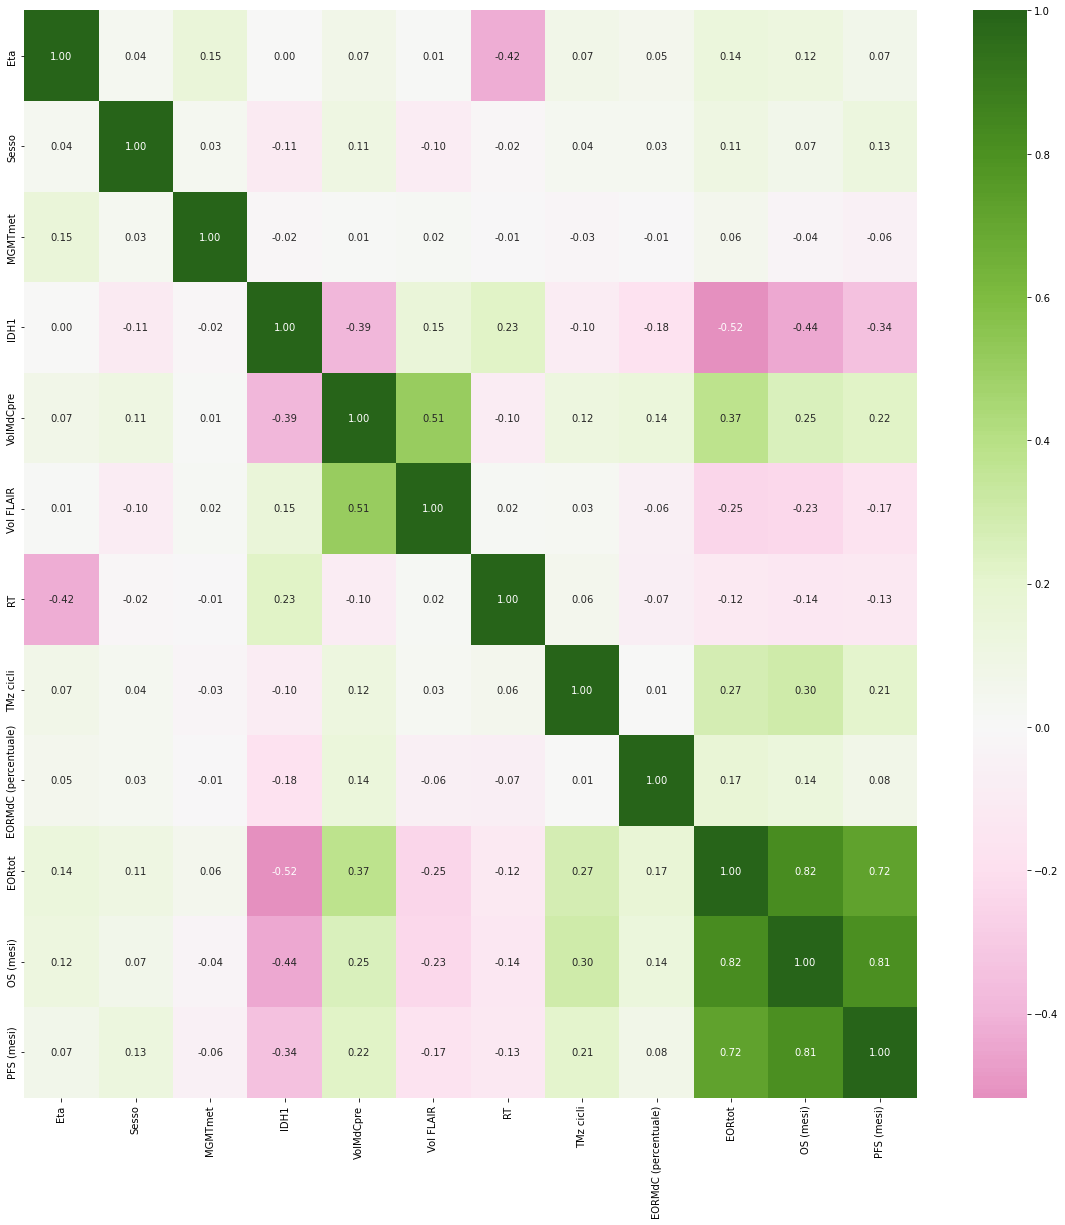

In [14]:
# plot correlation matrix

corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", center=0, cmap='PiYG')
plt.show()

In order to more effectively apply machine learning algorithms in the future, we need to normalize a few columns.

In [5]:
#normalize data by column
column_excluded = ['Sesso', 'MGMTmet', 'IDH1']
for column in data.columns:
    if column not in column_excluded:
        data[column] = (data[column] - data[column].mean()) / data[column].std()
data.head()


,Eta,Sesso,MGMTmet,IDH1,VolMdCpre,Vol FLAIR,RT,TMz cicli,EORMdC (percentuale),EORtot,OS (mesi),PFS (mesi)
0,-0.973648,1,0,1,0.427323,1.831101,0.321120,-0.085274,-0.360291,-0.686745,-1.042213,-0.686944
1,-0.973648,1,0,1,0.291637,1.305539,0.321120,-0.085274,0.231308,0.488303,-0.312542,0.343472
2,-0.641156,1,0,1,0.110722,-1.406522,0.321120,-0.085274,0.231308,0.073801,-0.494960,-0.042934
3,1.187552,1,1,1,1.689613,2.936386,0.321120,-0.085274,-0.300493,-0.746639,-0.859795,-0.944548
4,1.104429,1,0,1,-1.270807,-1.099610,-1.558608,-0.085274,0.231308,0.272214,0.052293,-0.171736


We also remap the values in the 'Sesso' column to 1 and 0.

In [6]:
data['Sesso'] = data['Sesso'].apply(lambda x: 1 if x == 1 else 0)
data

And we plot the correlation matrix again. We notice the correlation between 'Sesso' and the last columns has of course switched sign.

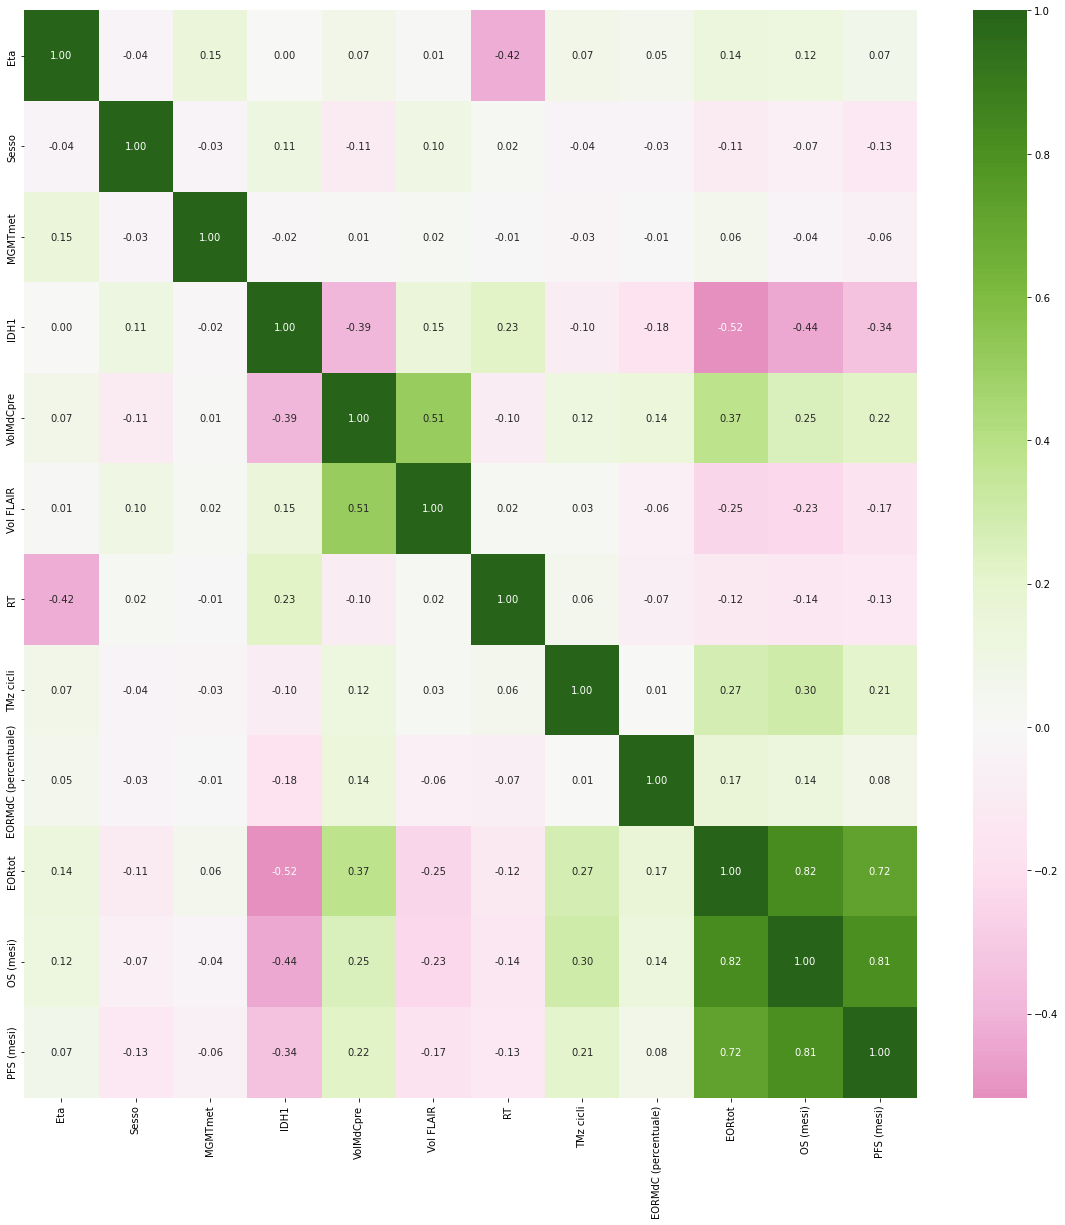

In [10]:
# plot correlation matrix
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", center=0, cmap='PiYG')
plt.show()
